# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

# Introduction
Random processes are very common in physics. When dealing with large numbers of molecules, such as in gases, we don’t describe the trajectory of every single particle ($10^{23}$ particles is too much to handle) but often use probabilities to determine the average behaviour. Here, we look at some illustrative examples of using random numbers in physical applications.

## Random walks
The random walk problem is a classic example which, despite its simplicity, describes very well the basic physical phenomenon of _diffusion_. Diffusion is a process where par- ticles which are initially concentrated in a region in space spread out with time. For example, a drop of ink in water will gradually spread to the whole volume of water, even if the water is perfectly still. This is because the individual molecules (both the ink and the water) (i) have random directions and speeds, which depend on the temperature, and (ii) also collide with each other. It turns out that these two ingredients can be modelled very easily.

## The method
We first look at a random walk in 1-D for a single particle. We start the particle off at the origin of the x-axis and assume that it moves unit distance in each time step (the molecular speed is thus 1 unit). At the end of each time step we set the direction to left or right with equal probability, mimicking the effect of collisions. You can easily write the python code, but for flexibility of later python coding, I show here how to define a function, called `walk(steps)`, which is passed a single number steps and returns a vector of that length, which contains all the positions of the random walk.

In [2]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # initialise the array of integers
    x[0] = 0  # start at the origin
    for i in range(1, len(x)):
        rnd = random()  # rnd selected from [0,1)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # steps right one unit
        else:
            x[i] = x[i-1] - 1 # steps left one unit
    return x

IMPORTANT: Make sure you understand how this function is used, and how it works. The rest of this worksheet is based on using it. You can also use the vectorised version below.

In [3]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x

# Exercises

This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video example on 2D array slicing.



# Slicing

## Rainfall

The file [rain.txt](https://raw.githubusercontent.com/PX2134/extra/master/rain.txt) contains the monthly average rainfalls in millimeters for Cardiff, Berlin and Los Angeles (in that order). Loading the data into a single array, and using this array, plot:

- The monthly rainfall for each city
- The yearly average rainfall for each city
- The average rainfall between all cities for each month
- The seasonal rainfall for each city

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!wget -q https://raw.githubusercontent.com/PX2134/extra/master/rain.txt
rain = np.loadtxt('rain.txt')

rain.shape #data has 3 rows and 12 columns (one row for each city)

(3, 12)

In [6]:
#Rainfall for Cardiff
rain[0,:] #array of first row of data set, and all colums
#Rainfall for all 3 cities, in January
rain[:,0] #all columns for first row

array([121.6 ,  37.2 ,   3.12])

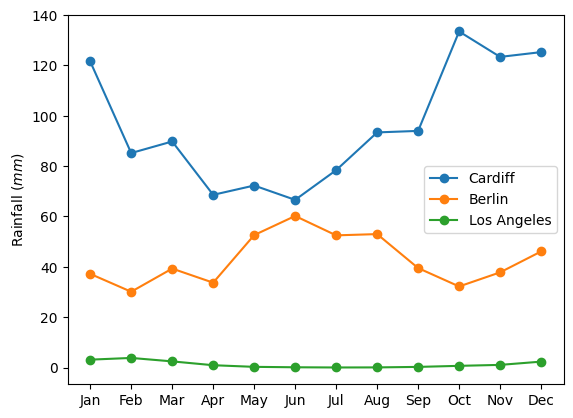

In [7]:
#Part One
cities=['Cardiff','Berlin','Los Angeles']
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(3):
  rain[i,:]
  plt.plot(months,rain[i,:],marker='o',label=cities[i])
plt.ylabel('Rainfall ($mm$)')
plt.legend()

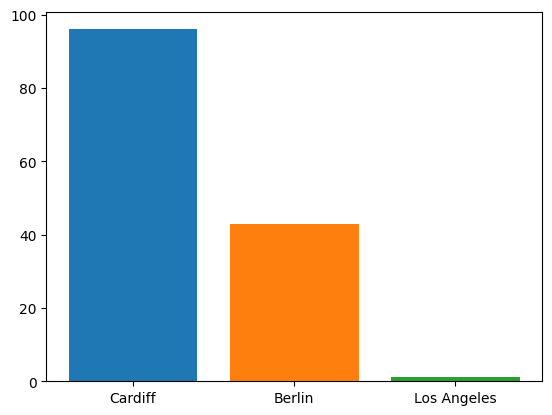

In [8]:
#Part Two
for i in range(3):
  plt.bar(cities[i],np.average(rain[i,:]))


Text(0.5, 1.0, 'Average Rainfall between all 3 cities')

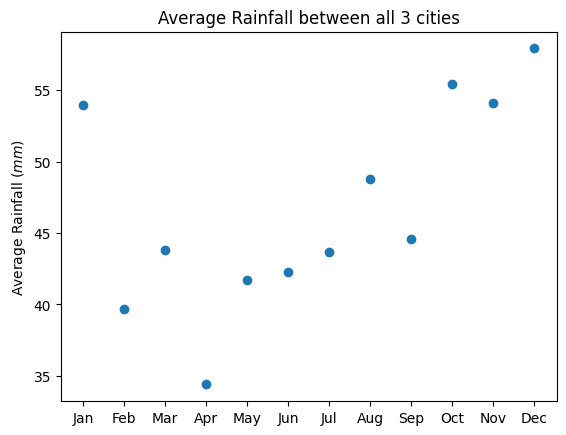

In [9]:
#Part Three
average = np.zeros(12)

for i in range(12):
  average[i]=np.average(rain[:,i])
plt.plot(months,average,'o')
plt.ylabel('Average Rainfall ($mm$)')
plt.title('Average Rainfall between all 3 cities')

## Exercise 1
Use the above function to write code for a single random walker in 1-D.

 1. [2] Plot to the screen a random walk for 1000 steps, i.e. plot out the steps (position $x$ plotted
against step number $i$).
 2. [2] Plot out as above, but this time for 100 such walks (all displayed on the same
graph). You should do this simply by writing a loop.

Text(0.5, 1.0, 'Random walk of 1000 steps')

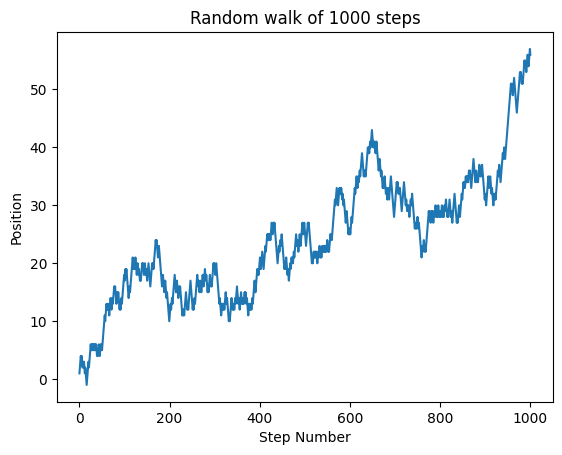

In [10]:
#1
def walk(steps):
  x = np.random.choice([-1,1], size=steps)
  x = np.cumsum(x)
  return x


steps=1000
pos_data = walk(steps)
x = np.linspace(0,1001,1000)

plt.plot(x,pos_data)
plt.xlabel('Step Number')
plt.ylabel('Position')
plt.title('Random walk of 1000 steps')

Text(0, 0.5, 'Position')

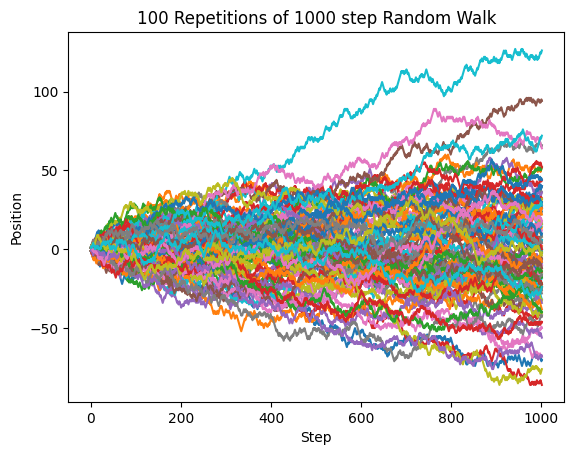

In [11]:
#2
for i in range(100):
  steps = 1000
  pos_data = walk(steps)
  x = np.linspace(0,1001,1000)
  plt.plot(x,pos_data)

plt.title('100 Repetitions of 1000 step Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')

## Exercise 2
You will now extend your code to allow for _multiple_ walks in a more systematic way. Do this by defining a 2-D array to contain the trajectories of `N` particles, each taking a number of steps called `steps`, i.e. define an initially empty integer array like this:
```python
particles = np.zeros((steps, N), int)
```
Which you will fill with the `steps` of each `N` particles. You may find [week 6 of PX1224](https://alexandria.astro.cf.ac.uk/Joomla-python/index.php/week-6-two-dimensional-arrays) useful, in particular "2.2. Returning parts of 2-d Arrays".

 1. [2] Calculate and then plot out the steps for 10 walkers to the screen (still use 1000 steps), all on the same plot.
 2. [2] Calculate (plot if you wish) the steps for 500 walkers. We define _for each step_ a "mean position": the average of the positions of all walkers at each step. We also define _for each step_ a "mean squared position": the average of the squares of the positions of all walkers (**not** the square of the average) at each step. Those two quantities, the "mean position" and the "mean squared position" are standard quantities in random walks. Print out the "mean position" and the "mean squared position" of the 500 walkers at the _last_ step.
 3. [4] Calculate the mean position at _each_ step, and plot it.
 4. [4] Calculate the mean squared position of the 500 walkers at _each_ step, and
plot it. What do you notice?



Text(0, 0.5, 'Position')

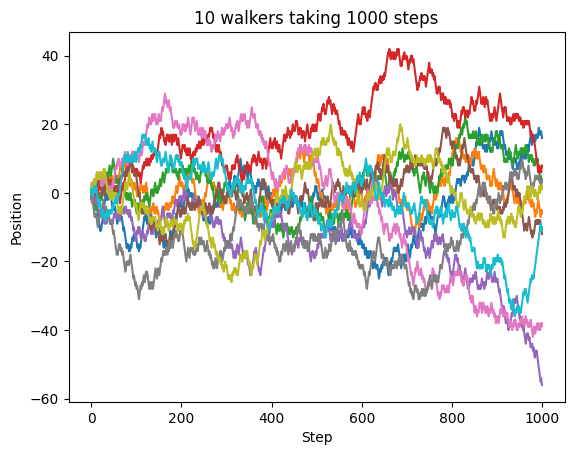

In [12]:
#1
N = 10
steps = 1000
particles = np.zeros((steps, N), int)

for i in range(N):
  x = walk(steps)
  particles[:,i] = x # assigns a walk to each step
    # [:,i] gives all steps for i walker
    # loop then iterates it over whole N population

plt.plot(particles); # ; cuts output
plt.title('10 walkers taking 1000 steps')
plt.xlabel('Step')
plt.ylabel('Position')

2.384
904.768


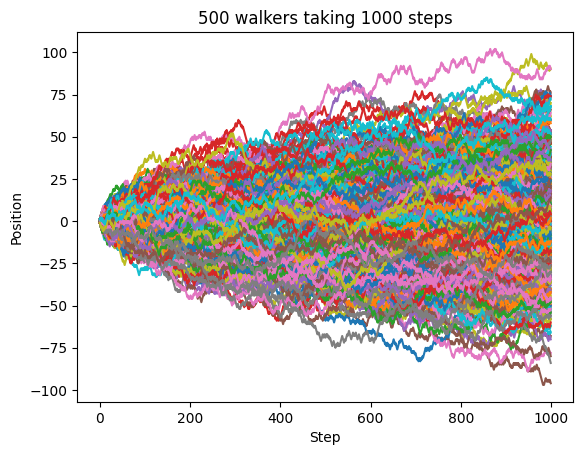

In [13]:
#2
N = 500
steps = 1000
particles = np.zeros((steps, N), int)

for i in range(N):
  x = walk(steps)
  particles[:,i] = x

plt.plot(particles); # ; cuts output
plt.title('500 walkers taking 1000 steps')
plt.xlabel('Step')
plt.ylabel('Position')

# finding mean position for each step
last_step = particles[-1]
ls_mean = np.mean(last_step)
print(ls_mean)
ls_mean_2 = np.mean(last_step**2)
print(ls_mean_2)

Text(0, 0.5, 'Mean Position')

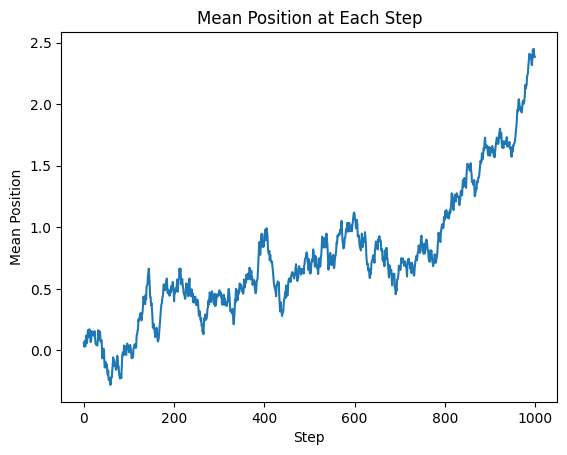

In [14]:
#3
mp = np.mean(particles, axis=1)
plt.plot(mp)
plt.title('Mean Position at Each Step')
plt.xlabel('Step')
plt.ylabel('Mean Position')

The plot is linear, and is the sum of the means squared, which is why it
doesnt come back to zero as neg squared is pos


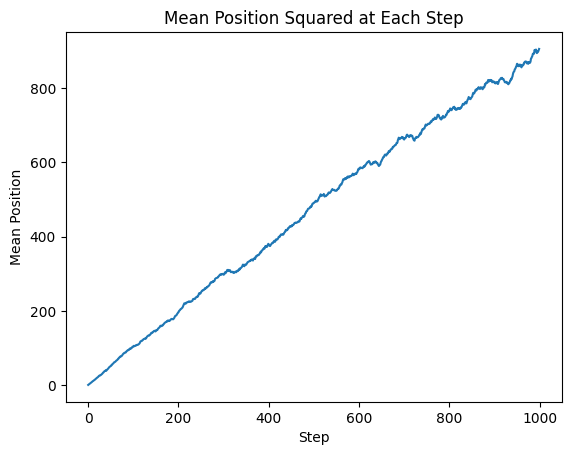

In [15]:
#4
mp_2 = mp = np.mean(particles**2, axis=1)
plt.plot(mp)
plt.title('Mean Position Squared at Each Step');
plt.xlabel('Step')
plt.ylabel('Mean Position');

print('The plot is linear, and is the sum of the means squared, which is why it')
print('doesnt come back to zero as neg squared is pos')

## Exercise 3
Extend the previous exercise by plotting a histogram of particle positions. You will need to decide yourself how best to do this. You will need to use the histogram function `plt.hist`.

 1. [2] Plot a histogram at the _last_ step.
 2. [2] Plot a histogram for intermediate steps of your choice to illustrate how it changes with the number of steps. Each histogram should be saved as an image to that they can easily be viewed afterwards. (If you feel ambitious, you could make an animation, see the solution to the optional question of week 3 for an example how).


Text(0, 0.5, 'Frequency')

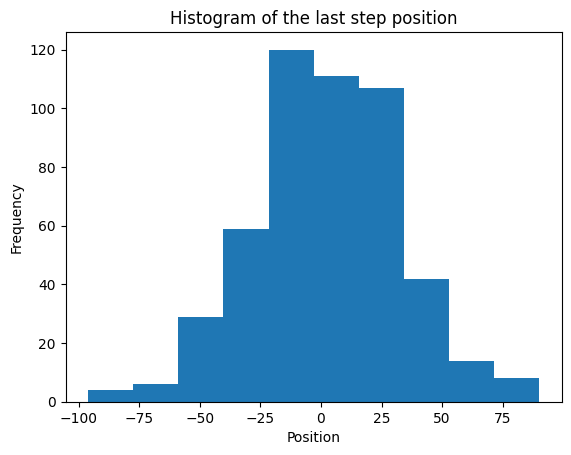

In [16]:
#1
plt.hist(last_step);
plt.title('Histogram of the last step position')
plt.xlabel('Position')
plt.ylabel('Frequency')

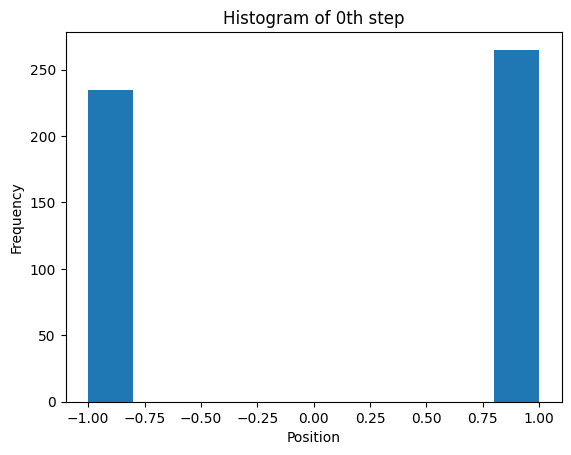

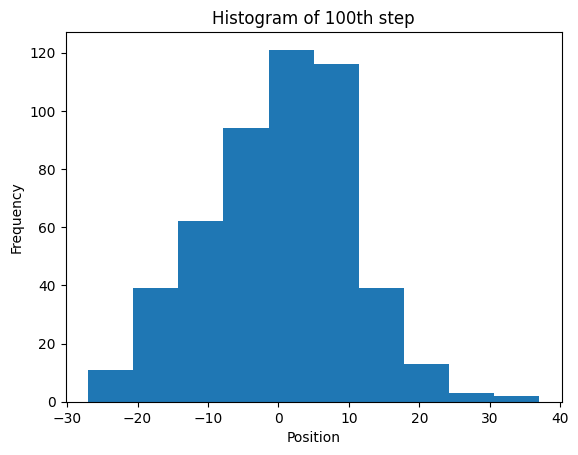

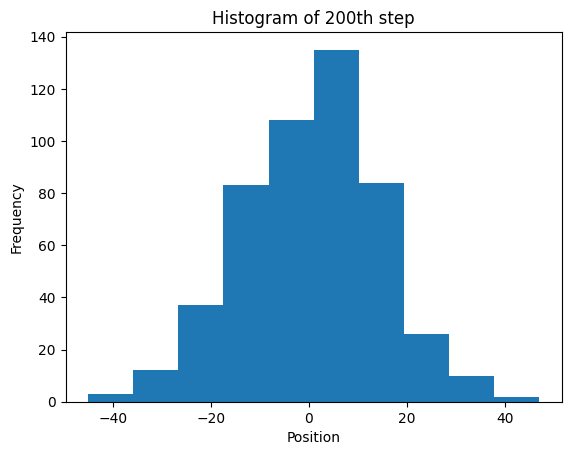

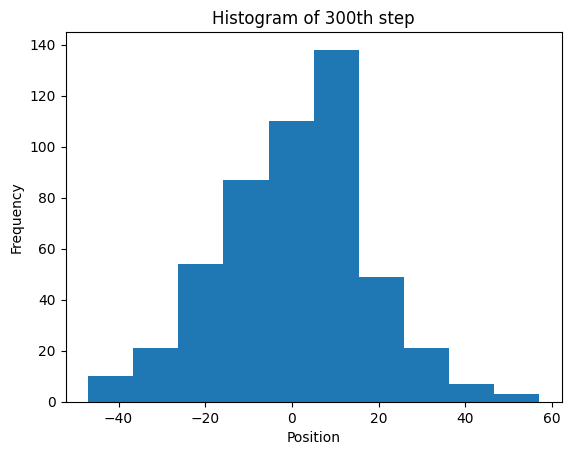

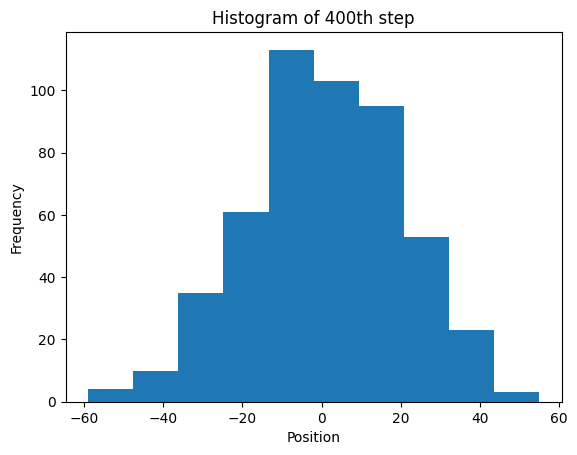

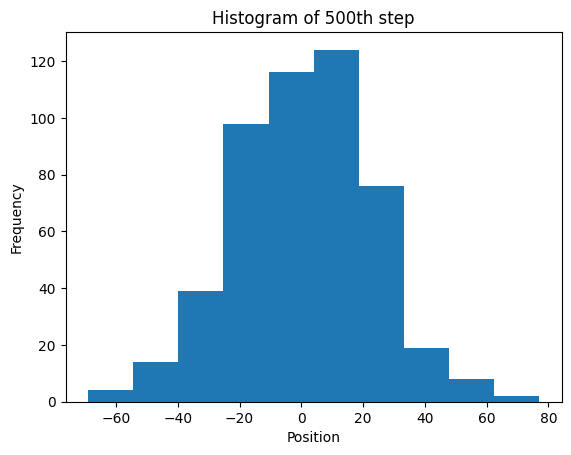

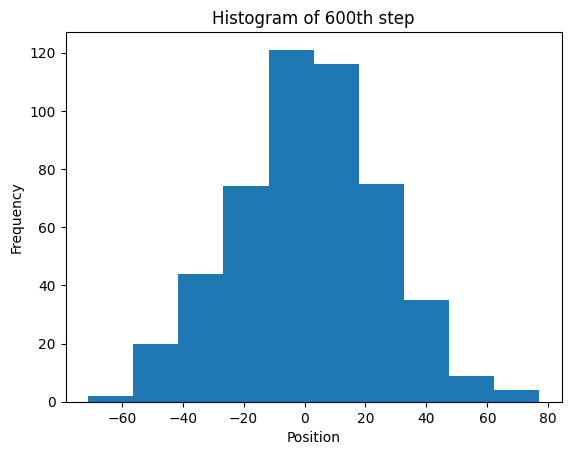

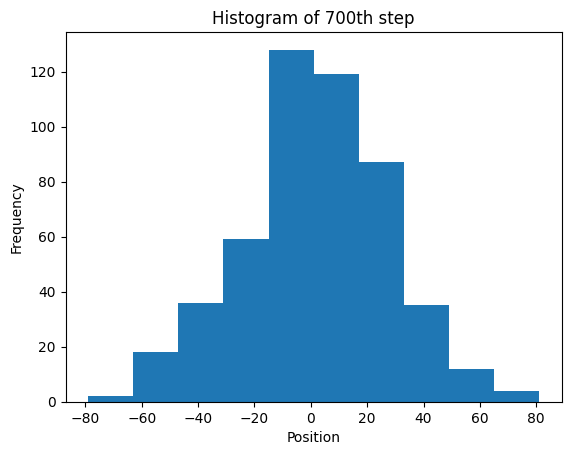

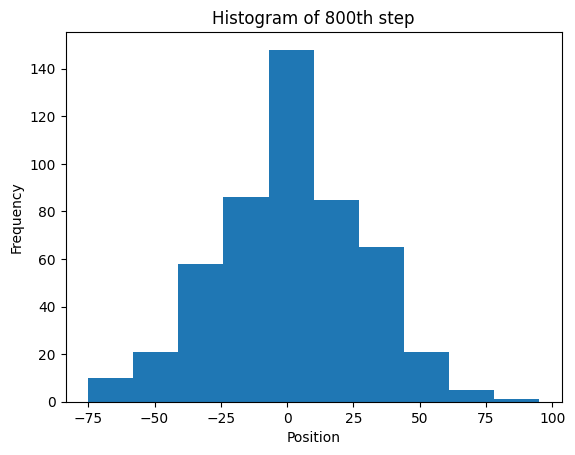

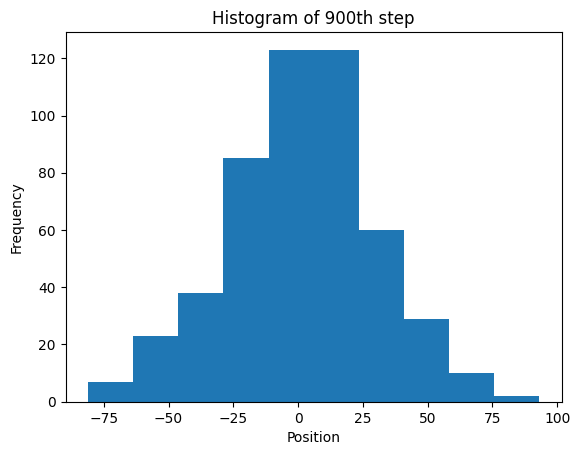

In [17]:
#2
for i in range (0, 1000, 100):
  plt.figure()
  plt.hist(particles[i])
  plt.title('Histogram of {}th step'.format(i))
  plt.xlabel('Position')
  plt.ylabel('Frequency')
  plt.savefig('Histogram of {}th step'.format(i))